In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import nichepca as npc
import torch

from src.utilities import *

from collections import Counter
import random
from tqdm import tqdm 

device = "cpu"
torch.set_num_threads(100)

seed = 200
torch.manual_seed(seed)

/home/byousefi/envs/nichepca/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
save_path = "data/"
data_path = "/data/projects/robin/segmentation/xenium_outs/merged_processed_cleaned.h5ad"

In [3]:
# Read data
adata = sc.read_h5ad(data_path)

In [6]:
adata.obs['sample'] = [i.split('_')[0] for i in adata.obs['Patient_Sample_ID']]
sample_set = adata.obs['sample'].unique()
sample_set

array(['X40', 'X39', 'X38', 'X37', 'X36', 'X35', 'X34', 'X33', 'X63',
       'X61', 'X62', 'X60', 'X59', 'X58', 'X57', 'X32', 'X31', 'X30',
       'X29', 'X28', 'X27', 'X26', 'X25', 'X56', 'X55', 'X54', 'X53',
       'X52', 'X50', 'X51', 'X49', 'X8', 'X7', 'X6', 'X4', 'X5', 'X2',
       'X3', 'X1', 'X48', 'X47', 'X46', 'X45', 'X44', 'X43', 'X42', 'X41',
       'X16', 'X15', 'X14', 'X12', 'X13', 'X11', 'X10', 'X9', 'X24',
       'X23', 'X22', 'X21', 'X20', 'X19', 'X18', 'X17'], dtype=object)

In [20]:
s = ['X40', 'X39', 'X38', 'X37', 'X36', 'X35', 'X34', 'X33', 'X63',
       'X61', 'X62', 'X60', 'X59', 'X58', 'X57', 'X32', 'X31', 'X30',
       'X29', 'X28', 'X27', 'X26', 'X25', 'X56', 'X55', 'X54', 'X53',
       'X52', 'X50', 'X51', 'X49', 'X8', 'X7', 'X6', 'X4', 'X5', 'X2',
       'X3', 'X1', 'X48', 'X47']

In [21]:
sample

'X47'

In [ ]:
# run domain pca
for sample in tqdm(sample_set):
    
    if sample in s:
        continue
    print(sample)
    
    adata_sample = adata[adata.obs['sample'] == sample]
    
    npc.wf.run_nichepca(adata_sample, 
                        knn=5,
                        radius=None,
                        n_comps=30)

    resolutions = np.arange(0.03, 4.0, 0.02)
    resolutions = resolutions.round(4).tolist()
    sc.pp.neighbors(adata_sample, use_rep="X_pca")
    adata_sample, _ = multiple_lediden(adata_sample, resolutions, key_added='leiden', n_jobs=20, verbos=False)

    # adata_sample.write_h5ad(f"data/adata_nichepca_sample_{sample}_clustered.h5ad")
    adata_sample.write_h5ad(f"/projectbig/jupyternotebook/xenium_cgn/domain_identification_from_epyc/adata_nichepca_sample_{sample}_clustered.h5ad")

  0%|          | 0/63 [00:00<?, ?it/s]

X46


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.332204580307007, adata.X.sum() = 962495.5625
  warn(


----------- Graph Stats -----------
Number of nodes: 45733
Number of edges: 309695
Average in-degree: 6.771805763244629
Average out-degree: 6.771805763244629
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

X45


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.4022722244262695, adata.X.sum() = 1493093.875
  warn(


----------- Graph Stats -----------
Number of nodes: 75277
Number of edges: 509711
Average in-degree: 6.771138668060303
Average out-degree: 6.771138668060303
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


 68%|██████▊   | 43/63 [17:20<10:01, 30.07s/it]

X44


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.409496307373047, adata.X.sum() = 1219822.875
  warn(
/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


----------- Graph Stats -----------
Number of nodes: 61254
Number of edges: 416464
Average in-degree: 6.798968315124512
Average out-degree: 6.798968315124512
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph

X43


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.3151423931121826, adata.X.sum() = 888186.8125
  warn(


----------- Graph Stats -----------
Number of nodes: 43826
Number of edges: 295304
Average in-degree: 6.738100528717041
Average out-degree: 6.738100528717041
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also 

X42


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.350935697555542, adata.X.sum() = 289240.1875
  warn(
/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


----------- Graph Stats -----------
Number of nodes: 15248
Number of edges: 104314
Average in-degree: 6.841159343719482
Average out-degree: 6.841159343719482
Contains self-loops: True
Is undirected: True


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

X41


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.3945083618164062, adata.X.sum() = 840312.5
  warn(


----------- Graph Stats -----------
Number of nodes: 52400
Number of edges: 365878
Average in-degree: 6.982404708862305
Average out-degree: 6.982404708862305
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

X16
----------- Graph Stats -----------
Number of nodes: 41149
Number of edges: 278121
Average in-degree: 6.758876323699951
Average out-degree: 6.758876323699951
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.367295742034912, adata.X.sum() = 846942.0
  warn(
/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

X15
----------- Graph Stats -----------
Number of nodes: 41327
Number of edges: 279439
Average in-degree: 6.761657238006592
Average out-degree: 6.761657238006592
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.367295742034912, adata.X.sum() = 745641.1875
  warn(
/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

In [ ]:
resolution_best = .1

sc.pl.pca(
    adata_sample,
    color="leiden_res_"+str(resolution_best),
        wspace=0.4,
)

/home/byousefi/envs/nichepca/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


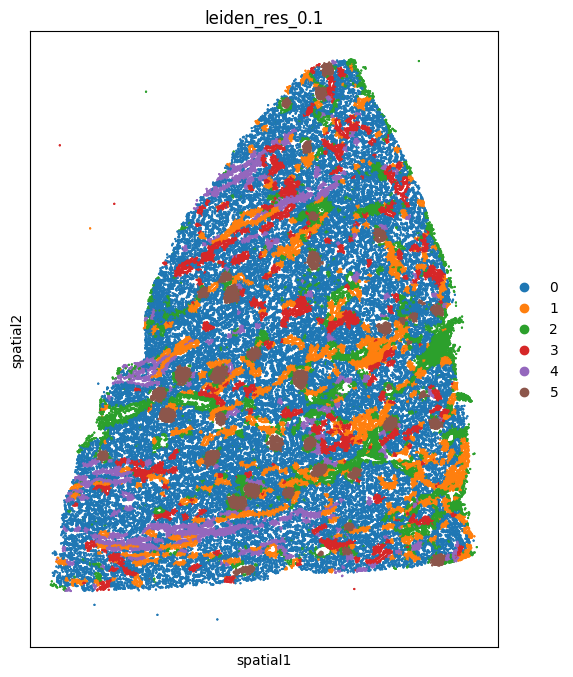

In [20]:
# adata_i.uns.pop(f'leiden_{resolution_best}_colors');
resolution_best = .1

fig, ax = plt.subplots(figsize=(8, 8))

sq.pl.spatial_scatter(
    adata_sample,
    library_id="spatial",
    shape=None,
    color="leiden_res_"+str(resolution_best),
    wspace=0.1,
    ax = ax
)

In [ ]:
adata_sample.obs['is_glom'] = '0'
adata_sample.obs.loc[adata_sample.obs['leiden_res_0.2'] == '6', 'is_glom'] = '1'

In [ ]:
# adata_i.uns.pop(f'leiden_{resolution_best}_colors');

fig, ax = plt.subplots(figsize=(8, 8))
sq.pl.spatial_scatter(
    adata_sample,
    library_id="spatial",
    shape=None,
    color='is_glom',
    wspace=0.1,
    ax = ax
)

In [ ]:
adata_sample.write(f"data/adata_nichepca_sample_{sample}_clustered.h5ad")
f"data/adata_nichepca_sample_{sample}_clustered.h5ad"

In [22]:
adata_sample

AnnData object with n_obs × n_vars = 91118 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_l1_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap', 'graph', 'leiden_res_0.1_colors', 'leiden_res_0.2_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [43]:
resolutions = np.arange(0.03, 4.0, 0.02)

In [44]:
len(resolutions)

199

In [40]:
resolutions

array([0.03, 0.13, 0.23, 0.33, 0.43, 0.53, 0.63, 0.73, 0.83, 0.93, 1.03,
       1.13, 1.23, 1.33, 1.43, 1.53, 1.63, 1.73, 1.83, 1.93, 2.03, 2.13,
       2.23, 2.33, 2.43, 2.53, 2.63, 2.73, 2.83, 2.93, 3.03, 3.13, 3.23,
       3.33, 3.43, 3.53, 3.63, 3.73, 3.83, 3.93])